In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


---

The exam has 20 questions.
* Q1 is a conceptual question with 3 parts, each worth 3 points.
* Q2-Q19 is about a dataset of drug overdoses.
    * Q2 is worth 3 points
    * Q3-Q15 are worth 4 points each
    * Q16-Q18 are worth 6 points each
    * Q19 is worth 8 points
* Q20 is a classification question on a dataset of chess games.
    * Part (a) is worth 7 points
    * Part (b) is worth 3 points

*Best of luck!*

---

![Figures](Figures.png)

Consider the two datasets above, where the two colors correspond to two different classes. For the following questions, provide a short reason for your answers. You may use the points named in the figures (from A to P) for your explanations. If there are multiple possible choices for your answer, you can provide any one.

### [Q1(a) 3 points]
Which dataset can I classify better using a depth-1 decision tree (which only allows one top-level split)?

*Fill in*

Dataset-2

### [Q1(b) 3 points]
Which dataset can I classify better using a depth-2 decision tree?

*Fill in*

Dataset -1

### [Q1(c) 3 points]
Can any linear separator achieve better than 50% accuracy on Dataset 1? Why or why not?

Yes, Linear regression ... Same concept as depth-1 Decision tree

---

We will consider a dataset (*overdoses.csv*) where each row represents one drug-related death in Connecticut. We will use the following fields:
* Date, Age, Sex, and Race are self-explanatory
* ResidenceCity and ResidenceCounty are the city and county where the deceased person lived.
* DeathCity and DeathCounty are the city and county where the death was reported.
* COD is a text string for the Cause Of Death
* Location is the place where the person died. For example, it could be a Hospital.
* LocationifOther is an extra string giving more details about the Location.
* There are many columns for individual drugs. For example, under the column named "Heroin", we have a "Y" if the person had Heroin in their blood. If there was no Heroin in their blood, the value is missing.
    * Sometimes the value may be something other than a "Y". When this happens, we will just think of it as missing.
    * The "Other" column lists drug names instead of a "Y". We will ignore the "Other" column.
* DeathCityGeo and ResidenceCityGeo give latitude and longitude coordinates for the death and residence cities

### [Q2 3 points] Read in overdoses.csv

Print the SECOND row.

In [2]:
overdose = pd.read_csv("overdoses.csv", index_col=0)
overdose.iloc[1]

Date                                        3/21/2013 0:00
DateType                                       DateofDeath
Age                                                   48.0
Sex                                                   Male
Race                                                 Black
ResidenceCity                                      NORWALK
ResidenceCounty                                        NaN
ResidenceState                                         NaN
DeathCity                                          NORWALK
DeathCounty                                      FAIRFIELD
Location                                          Hospital
LocationifOther                                        NaN
DescriptionofInjury                                    NaN
InjuryPlace                                            NaN
InjuryCity                                             NaN
InjuryCounty                                           NaN
InjuryState                                            N


In some of the following questions, we will need to access the columns corresponding to various drugs.
To make it easier, I have created a list called **drug_names** that you should use in your code. 

* You will need this in Q14, Q16, Q18, and Q19.

**Make sure you run this code cell before proceeding**

In [3]:
drug_names = ['Heroin', 'Cocaine', 'Fentanyl', 'FentanylAnalogue', 'Oxycodone', 'Oxymorphone',
              'Ethanol', 'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tramad',
              'Morphine_NotHeroin', 'Hydromorphone', 'OpiateNOS', 'AnyOpioid']

### [Q3 4 points] What is the ratio of Males to Females in this dataset?

In [33]:
q3 = overdose["Sex"].dropna()
print("No. of male:",sum(q3 == "Male"))
print("No. of female:",sum(q3 == "Female"))
print("Ratio: {}".format(sum(q3 == "Male")/sum(q3 == "Female")))

No. of male: 3772
No. of female: 1325
Ratio: 2.8467924528301887


### [Q4 4 points] How often is the DeathCity the same as the ResidenceCity?

In [5]:
sum(overdose["DeathCity"] == overdose["ResidenceCity"])

3595

### [Q5 4 points] How many rows are missing either the ResidenceCity or the DeathCity or both?

In [34]:
overdose[['DeathCity','ResidenceCity']].shape[0] - overdose[['DeathCity','ResidenceCity']].dropna(how="any").shape[0]

172

### [Q6 4 points] Cities per county

Print out the number of unique DeathCity in each DeathCounty.
* Sometimes either DeathCity or DeathCounty is missing. You should not count these missing rows.
* You will find one obviously-wrong value for DeathCounty. Don't worry about it.

In [35]:
q6 = overdose[["DeathCity","DeathCounty"]].dropna(how="all").drop_duplicates()
q6.groupby("DeathCounty")["DeathCity"].agg("count").sort_values(ascending=False)

DeathCounty
HARTFORD      36
NEW LONDON    33
LITCHFIELD    30
NEW HAVEN     29
WINDHAM       27
FAIRFIELD     25
TOLLAND       19
MIDDLESEX     17
USA            1
Name: DeathCity, dtype: int64

### [Q7 4 points] Drugs for age groups

Split the deaths into 5 equal-sized groups based on Age.
* Each group should have (roughly) the same number of people.

Find the most common COD for each age group.

In [8]:
groups = pd.qcut(overdose["Age"], 5, retbins=True)
groups
q7 = pd.merge(left = overdose["COD"],
        right= groups[0],
        left_on=overdose.index,
        right_on = groups[0].index)
q7

,key_0,COD,Age
0,14-0273,"Acute fent, hydrocod, benzodiazepine",NaN
1,13-0102,Cocaine Intoxication,"(46.0, 54.0]"
2,16-0165,Acute Heroin and Cocaine Intoxication,"(13.999, 30.0]"
3,16-0208,Acute Fentanyl and Morphine Intoxication,"(13.999, 30.0]"
4,13-0052,Fentanyl Intoxication,"(13.999, 30.0]"
...,...,...,...
5098,15-0466,Acute Intoxication due to the Combined Effects...,"(38.0, 46.0]"
5099,17-0618,"Multidrug Toxicity Including Heroin, Alprazola...","(13.999, 30.0]"
5100,18-0646,"Multidrug Toxicity Including Heroin, Fentanyl,...","(13.999, 30.0]"
5101,14-0124,Acute Fentanyl intoxication,"(30.0, 38.0]"


In [40]:
q7.groupby(["Age","COD"]).size().unstack().apply(lambda x: (x.idxmax()),axis = 1)

Age
(13.999, 30.0]    Acute Fentanyl Intoxication
(30.0, 38.0]      Acute Fentanyl Intoxication
(38.0, 46.0]              Heroin Intoxication
(46.0, 54.0]           Multiple Drug Toxicity
(54.0, 87.0]           Multiple Drug Toxicity
dtype: object

### [Q8 4 points] Among deaths where the Location of death was a person's Residence, find the number of deaths in each ResidenceCity.

Plot the number of such deaths in the top-10 Residence Cities.

<AxesSubplot:xlabel='ResidenceCity'>

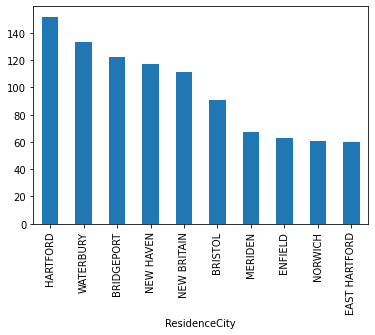

In [41]:
q8 = overdose[overdose["Location"] == 'Residence']
q8.groupby("ResidenceCity").size().sort_values(ascending=False)[:10].plot.bar()

### [Q9 4 points] For each Race, find the most common Sex among those who died.

In [12]:
overdose.groupby(["Race","Sex"]).size().unstack()[["Female","Male"]].apply(lambda row: (row.idxmax()), axis=1)

Race
Asian Indian                Male
Asian, Other                Male
Black                       Male
Chinese                   Female
Hawaiian                    Male
Hispanic, Black             Male
Hispanic, White             Male
Native American, Other      Male
Other                       Male
Unknown                     Male
White                       Male
dtype: object

### [Q10 4 points] Among the deaths where the COD is "Cocaine Intoxication", what fraction has a 'Y' under the Cocaine column?

In [13]:
mean(overdose[(overdose["COD"] == "Cocaine Intoxication")]["Cocaine"] == "Y")

1.0

### [Q11 4 points] Among deaths where Cocaine is detected but the COD does not mention 'Cocaine' or 'COCAINE', what is the most common COD?

In [14]:
import re
overdose[overdose["Cocaine"] == "Y"]["COD"].apply(lambda x: (x if not re.match("[Cocaine]|[COCAINE]", x) else np.nan)).dropna().value_counts().sort_values(ascending=False).index[0]

'Multiple Drug Toxicity'

In [15]:
overdose[overdose["Cocaine"] == "Y"]["COD"].apply(lambda x: (x if "cocaine" not in x.lower() else np.nan)).dropna().value_counts().sort_values(ascending=False).index[0]

'Multiple Drug Toxicity'

### [Q12 4 points] Plot number of deaths by Race.

Remove the "Unknown" Race from the plot.

<AxesSubplot:xlabel='Race'>

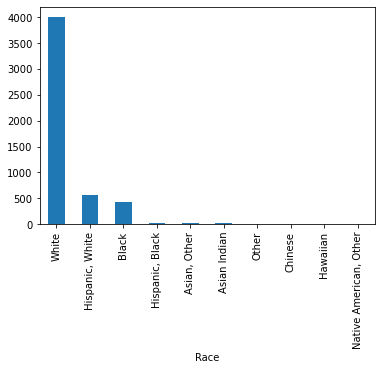

In [43]:
q12 = overdose.groupby("Race").size()
q12.pop("Unknown")
q12.sort_values(ascending=False).plot.bar()

### [Q13 4 points] LocationifOther data check

The LocationifOther column is supposed to be used only if the Location column has the value "Other". Let us check this.

Count the number of rows where LocationifOther is not missing, but Location is not Other.

In [17]:
overdose[(overdose["LocationifOther"].isna() == False) & (overdose["Location"] != "Other")].shape[0]

30

### [Q14 4 points] What drugs never co-occur with OpiateNOS?

Two drugs co-occur if there is at least one death where both those drugs had a "Y" under their columns.
You should consider all the drugs whose names are listed in **drug_names**.

In [18]:
q14 = overdose[overdose["OpiateNOS"] == "Y"][drug_names].groupby("OpiateNOS").count().iloc[0]

list(q14[q14 == 0].index.values)

['Heroin', 'FentanylAnalogue', 'Hydromorphone']

### [Q15 4 points] Create a column called DeathCityLatLong

Extract the latitude and longitude from the DeathCityGeo column. For example,
* If DeathCityGeo is "Norwalk, CT\n(41.11805, -73.412906)", then the DeathCityLatLong column should have the value "41.11805, -73.412906"

Print out the DeathCityGeo and DeathCityLatLong columns for the first 5 rows.

In [19]:
overdose["DeathCityLatLong"] = overdose["DeathCityGeo"].apply(lambda x: (re.search('(\d+.\d+, -?\d+.\d+)', x, re.IGNORECASE).group(1)))
overdose["DeathCityLatLong"][:5]

ID
14-0273    41.575155, -72.738288
13-0102     41.11805, -73.412906
16-0165    41.393666, -73.451539
16-0208    41.026526, -73.628549
13-0052    41.026526, -73.628549
Name: DeathCityLatLong, dtype: object

### [Q16 6 points] Data check

* Find all deaths where the COD has two words, and the last word is Intoxication. Call these "one-COD deaths".
    * For example, if COD is "Cocaine Intoxication", then it is a one-COD death.
    * But if COD is "Cocaine and Heroin Intoxication", it is not a one-COD death.
* For every one-COD death, figure out how many drug_names were found in the person's blood
    * So if there was a "Y" under the columns "Cocaine" and "AnyOpioid", we count that as 2 drugs.
* Find out how many "one-COD deaths" actually had two or more drug_names in the person's blood.

**Note**: You may find that "Heroin" and "AnyOpioid" are both "Y", but the COD only says "Heroin Intoxication". We will count that as two drugs in the person's blood, even though Heroin is actually an Opioid and this is not really a data error.

In [49]:
oneCOD_deaths = overdose[overdose["COD"].apply(lambda x: (True if re.match('\w+ Intoxication$',x, re.IGNORECASE) is not None else False))]
sum(oneCOD_deaths[drug_names].apply(lambda row: (sum(row == "Y")),axis = 1) > 1)

33

### [ Q17 6 points] Plot the number of deaths every month.

The x-axis should be the month, and the y-axis the number of deaths (i.e., rows) for that month.

In [50]:
overdose["Month"] = pd.to_datetime(overdose["Date"]).apply(lambda x: x.strftime('%B'))
overdose["Month"]

ID
14-0273         June
13-0102        March
16-0165        March
16-0208        March
13-0052     February
             ...    
15-0466    September
17-0618         July
18-0646       August
14-0124        March
16-0637    September
Name: Month, Length: 5103, dtype: object

<AxesSubplot:xlabel='Month'>

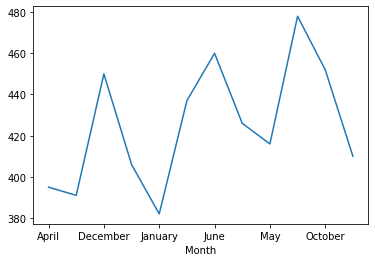

In [51]:
overdose.groupby("Month").size().plot(kind = "line")

### [Q18 6 points] Drug Cocktails
Look at deaths where COD mentions the word 'COMBINED'.
Among these deaths, count how many drugs were involved by checking how many of the drug name columns had a 'Y'
Show a bar plot where the x-axis is the number of drugs used, and the y-axis is the number of deaths caused by this drug cocktail.

<AxesSubplot:>

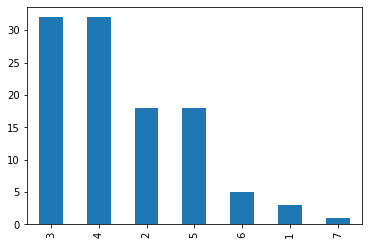

In [57]:
q18 = overdose[overdose["COD"].apply(lambda x: (True if re.search('COMBINED',x) is not None else False))]
q18.groupby(q18[drug_names].apply(lambda x: (sum(x == "Y")), axis=1)).size().sort_values(ascending = False).plot.bar()

### [Q19 8 points] Differences between races

* For each DeathCity and Race, figure out how many people had a particular drug in their blood when they died. For example,
    * among Whites in City A, there may be 50 deaths with Cocaine and 12 with Heroin.
    * among Asians in City A, there may be 30 Heroin and 20 Cocaine deaths.
    * among Hispanics in City A, there may be 19 Cocaine and 18 Heroin deaths.
* Now, figure out the top drug which caused the most deaths for each DeathCity and Race. Only consider drugs that killed at least 20 people of that Race in that DeathCity; if there is no such drug, just act as if no one of that Race died in that DeathCity.
    * among Whites in City A, Cocaine is the top drug.
    * among Asians in City A, it is Heroin.
    * among Hispanics in City A, no drug led to at least 20 deaths, so there is no top drug.
* Now, print out the DeathCities for which the top drug is different for at least two Races.
    * Since the top drugs in City A are Cocaine (Whites) and Heroin (Asians), print out City A.
    * But if a City B had Cocaine (Whites) and Cocaine (Asians), don't print out City B.
    * Or if a City C had Heroin (Asians) but no other race had enough deaths to have a top drug, don't print out City C.

In [73]:
def total_sum(inp):
    return sum(inp=="Y")

q19 = overdose.groupby(["DeathCity","Race"])[drug_names].agg(total_sum).apply(lambda x: (x.idxmax() if x.max() > 20 else np.nan),axis=1 ).dropna()
q19[:10]

DeathCity      Race           
BRIDGEPORT     Black                Cocaine
               Hispanic, White       Heroin
               White                 Heroin
BRISTOL        White              AnyOpioid
DANBURY        White                 Heroin
DERBY          White              AnyOpioid
EAST HARTFORD  White               Fentanyl
ENFIELD        White               Fentanyl
GROTON         White                 Heroin
HARTFORD       Black                Cocaine
dtype: object

In [74]:
q19.unstack()[q19.unstack().apply(lambda x: (True if len(x.dropna().unique()) > 1 else False), axis = 1)].index.values

array(['BRIDGEPORT', 'HARTFORD', 'NEW BRITAIN', 'NEW HAVEN', 'WATERBURY'],
      dtype=object)

---

We will try to predict chess games, using the file *games.csv*.

### [Q20(a) 7 points] Train and test accuracies

* Load in the games.csv file. 
* Split it into training and testing sets, where 80% of the data is used for training. 
* Use a logistic regression classifier to predict whether white will win or not.
    * Check if the "winner" column is "white" or not.
    * You should only use "white_rating", "black_rating" and "opening_name" as features. Don't use any other columns as features.
* Print the training and test accuracies.

In [101]:
games = pd.read_csv("games.csv")
games["winner"] = games["winner"].apply(lambda x: (1 if x == "white" else 0))
games.head()

,turns,winner,white_rating,black_rating,opening_name,opening_ply
0,13,1,1500,1191,Slav Defense: Exchange Variation,5
1,16,0,1322,1261,Nimzowitsch Defense: Kennedy Variation,4
2,61,1,1496,1500,King's Pawn Game: Leonardis Variation,3
3,61,1,1439,1454,Queen's Pawn Game: Zukertort Variation,3
4,95,1,1523,1469,Philidor Defense,5


In [102]:
from patsy import dmatrices
Y, X = dmatrices('winner ~ white_rating + black_rating + C(opening_name)', games, return_type='dataframe')
y = Y['winner'].values

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [104]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [105]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_train))

0.660663093605883


In [106]:
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.6358424725822532


### [Q20(b) 3 points] Probability of win

Print the probability of white winning a game where the game has the following features:
* white_rating is 2000
* black_rating is 1500
* All other features are exactly the same as in the first row of the games.csv file.

In [113]:
inp = X.iloc[0:1].copy()
inp["white_rating"] = 2000
inp["black_rating"] = 1500
inp

,Intercept,C(opening_name)[T.Alekhine Defense #2],C(opening_name)[T.Alekhine Defense #3],C(opening_name)[T.Alekhine Defense: Balogh Variation],C(opening_name)[T.Alekhine Defense: Brooklyn Variation],C(opening_name)[T.Alekhine Defense: Exchange Variation],C(opening_name)[T.Alekhine Defense: Four Pawns Attack],C(opening_name)[T.Alekhine Defense: Four Pawns Attack | 6...Nc6],C(opening_name)[T.Alekhine Defense: Four Pawns Attack | Fianchetto Variation],C(opening_name)[T.Alekhine Defense: Four Pawns Attack | Main Line],...,C(opening_name)[T.Zukertort Opening: Ross Gambit],C(opening_name)[T.Zukertort Opening: Santasiere's Folly],C(opening_name)[T.Zukertort Opening: Sicilian Invitation],C(opening_name)[T.Zukertort Opening: Slav Invitation],C(opening_name)[T.Zukertort Opening: Tennison Gambit],C(opening_name)[T.Zukertort Opening: The Walrus],C(opening_name)[T.Zukertort Opening: Vos Gambit],C(opening_name)[T.Zukertort Opening: Wade Defense],white_rating,black_rating
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000,1500


In [114]:
model.predict_proba(inp)

array([[0.17232981, 0.82767019]])